In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

## Import Data

In [46]:
with open('../JSON/AllPlayer/final/all_player2018.json', 'r') as loadFile:
    predict_data =  pd.DataFrame(json.load(loadFile))
with open('../JSON/MVP/final_mvp.json', 'r') as loadFile:
    train_data =  pd.DataFrame(json.load(loadFile))

## Finding best features

In [47]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [48]:
train_data.loc[:, 'G':].columns

Index(['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Share'],
      dtype='object')

In [49]:
orig_features = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']

In [50]:
x_data = train_data[orig_features].to_numpy()
y_data = train_data[['Share']].to_numpy()
y_data = y_data.reshape(y_data.shape[0], )

## Using Random forest to check most significant features

In [51]:
regressor = RandomForestRegressor(n_estimators=200)
regressor.fit(x_data, y_data)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [52]:
sorted_indices = np.argsort(regressor.feature_importances_)[::-1]
for index in sorted_indices:
    print(f"{orig_features[index]}: {regressor.feature_importances_[index]}")

WS: 0.0837102901543454
OWS: 0.08351143550601497
WS/48: 0.08274380861901445
VORP: 0.0812563065589536
PF: 0.046552107565016806
FGA: 0.042246305326336046
FG: 0.039802257346191035
MP: 0.03793064603933831
PTS: 0.03776036212138821
BPM: 0.03062774751887461
PER: 0.02514805310416944
TOV%: 0.02488667590187943
2P%: 0.021646267306657054
FTA: 0.021465247776474596
TS%: 0.020209002102301452
FTr: 0.017414249263672986
FT%: 0.017035502558921126
DWS: 0.01635204269558963
TOV: 0.01581117336419103
eFG%: 0.015727234678582797
STL%: 0.014674914534608088
3P%: 0.013659922659930037
ORB%: 0.013440994057686553
USG%: 0.012168647457101745
DBPM: 0.01203098725155736
DRB%: 0.011928562073251336
STL: 0.011791216781755706
OBPM: 0.010520200281295371
FG%: 0.01029754858469983
3PA: 0.010284393555646344
2PA: 0.010072847917448391
TRB: 0.009927448174060459
3P: 0.009833194030667165
FT: 0.009814037788198011
3PAr: 0.009024011010524352
AST: 0.00879205984862528
BLK%: 0.00824638856667557
DRB: 0.007911290403219912
2P: 0.0078389292457224

## Using feature selection

In [53]:
selector = SelectKBest(mutual_info_regression, k=5)
best_feat = selector.fit_transform(x_data, y_data)
sorted_indices = np.argsort(selector.scores_)[::-1]

In [54]:
for index in sorted_indices:
    print(f"{orig_features[index]}: {selector.scores_[index]:.4f}")

FG: 0.1576
STL: 0.1538
WS: 0.1503
VORP: 0.1420
WS/48: 0.1308
MP: 0.1253
OWS: 0.1229
PTS: 0.1074
TS%: 0.0975
OBPM: 0.0961
PER: 0.0918
BLK%: 0.0780
BPM: 0.0755
3P: 0.0745
STL%: 0.0665
FT: 0.0629
2P: 0.0574
DWS: 0.0546
FTr: 0.0539
FT%: 0.0504
ORB: 0.0429
2P%: 0.0425
TRB%: 0.0415
2PA: 0.0408
DRB: 0.0361
GS: 0.0322
3PAr: 0.0301
FGA: 0.0258
USG%: 0.0247
TRB: 0.0244
TOV: 0.0184
DRB%: 0.0163
BLK: 0.0160
ORB%: 0.0113
3P%: 0.0107
FTA: 0.0000
eFG%: 0.0000
AST: 0.0000
PF: 0.0000
3PA: 0.0000
FG%: 0.0000
AST%: 0.0000
TOV%: 0.0000
DBPM: 0.0000
G: 0.0000


## Correlation matrix

In [55]:
data = train_data[orig_features + ["Share"]]
import seaborn as sns

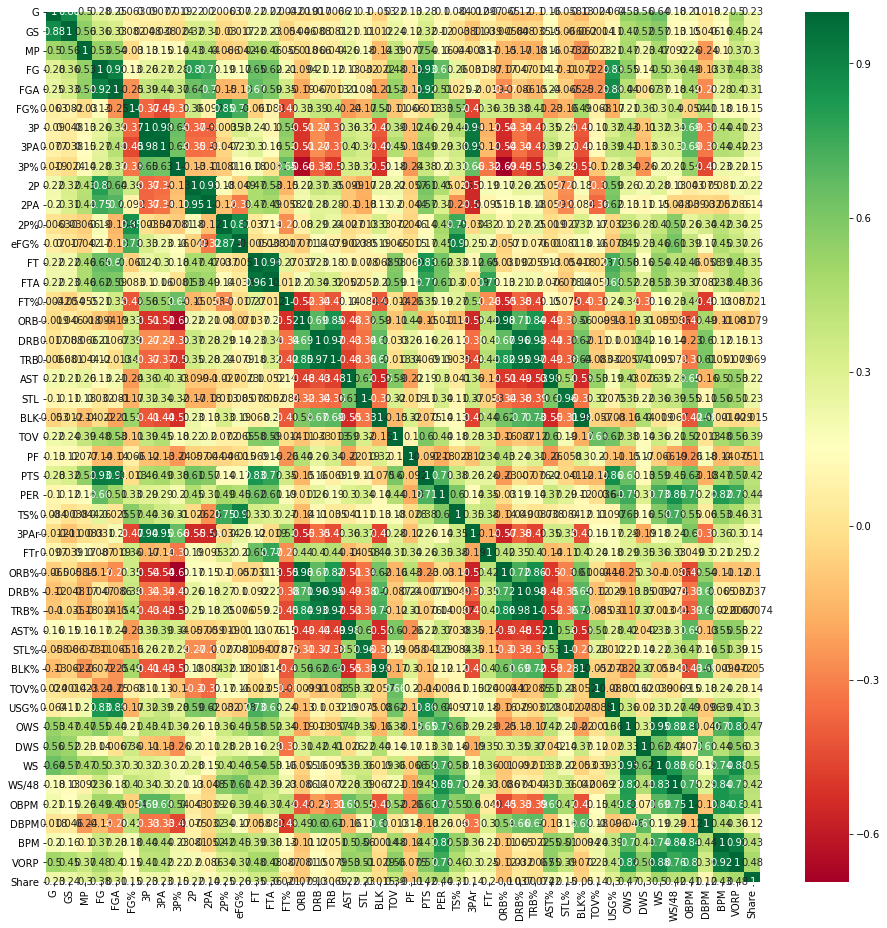

In [56]:
fig = plt.figure(figsize=(16, 16))
fig.set_facecolor('white')
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

In [57]:
features = ['VORP', 'WS', 'STL', 'FG', 'MP', 'OWS','WS/48','PTS', 'PER', 'BLK%']

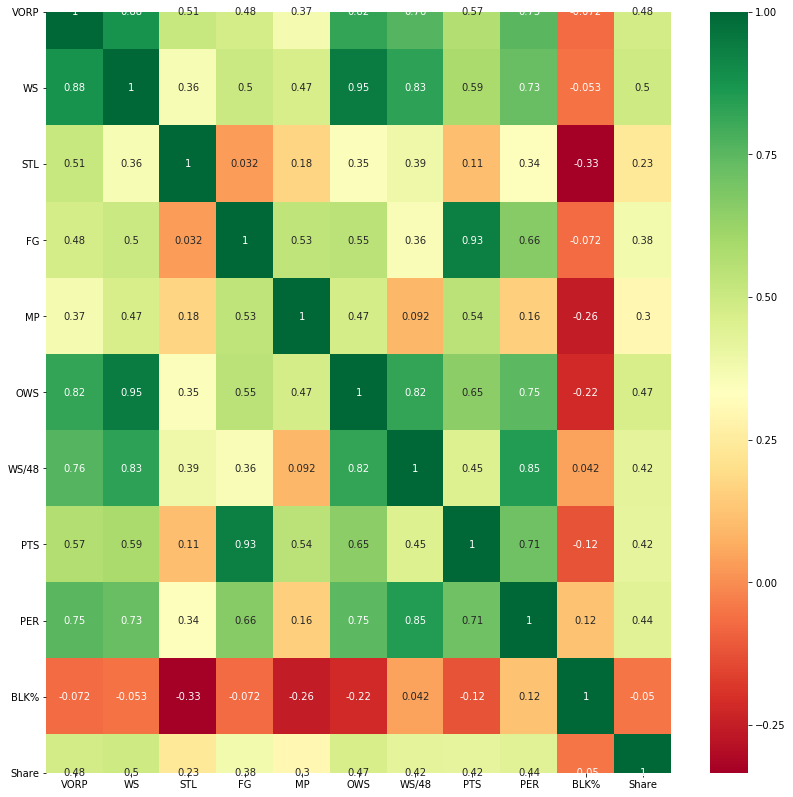

In [58]:
data = train_data[features + ["Share"]]
fig = plt.figure(figsize=(14, 14))

fig.set_facecolor('white')

sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")
_ = plt.yticks(rotation='horizontal')

In [75]:
data = train_data[features]
data.head()

,VORP,WS,STL,FG,MP,OWS,WS/48,PTS,PER,BLK%
0,11.6,20.3,1.7,9.7,37.7,13.7,0.318,28.4,31.7,2.4
1,2.8,7.9,1.3,8.9,39.0,5.2,0.132,25.3,20.8,1.4
2,4.9,12.7,1.5,9.8,36.1,8.6,0.206,26.8,24.4,1.0
3,4.6,13.8,1.0,7.1,35.7,6.2,0.234,20.6,25.4,5.9
4,9.7,14.7,2.2,10.8,38.6,10.3,0.232,30.2,30.4,2.8


In [76]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()

In [78]:
transformed = scaler.fit_transform(data)

In [79]:
pca = PCA(n_components=1)

In [80]:
decomposed = pca.fit_transform(transformed)

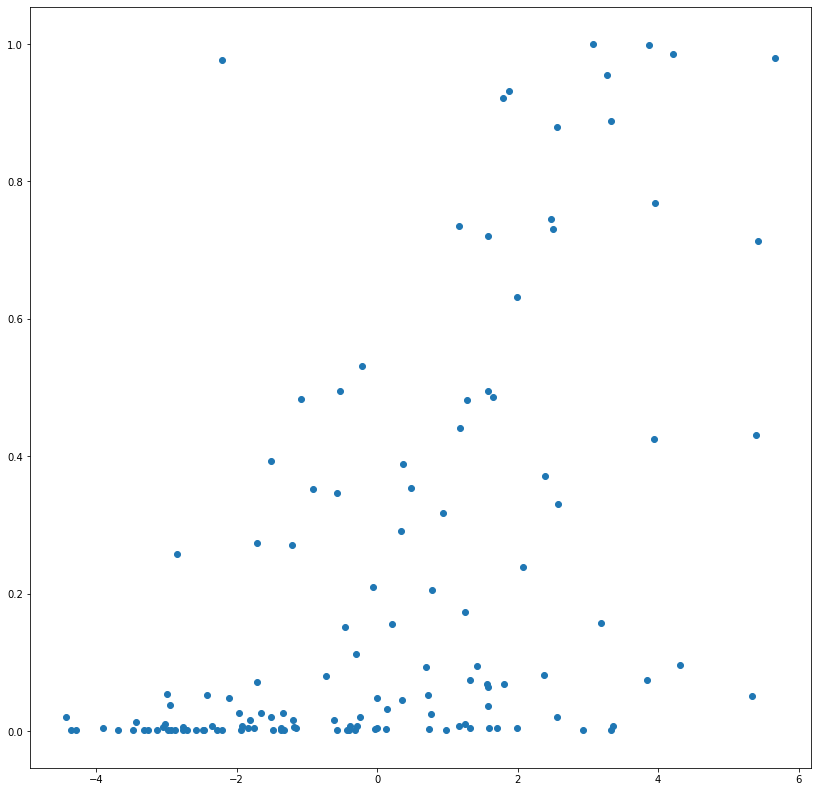

In [81]:
plt.figure(figsize=(14, 14))
plt.scatter(decomposed, train_data.Share)

Text(0.5, 0, 'Share')

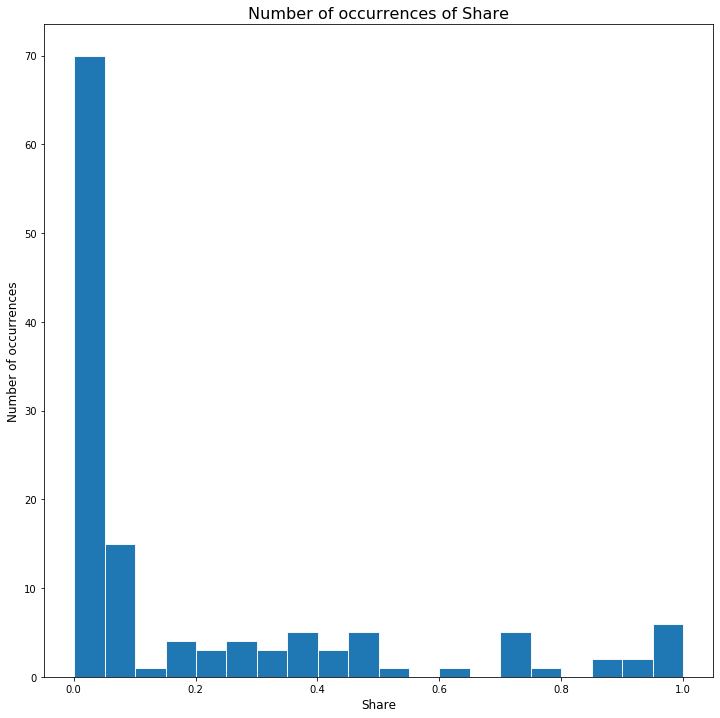

In [82]:
plt.figure(figsize=(12, 12))
plt.hist(train_data.Share, bins=20, edgecolor='#F5F5F5')
plt.title("Number of occurrences of Share", size=16)
plt.ylabel("Number of occurrences", size=12)
plt.xlabel("Share", size=12)

# Defining the pipeline

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(data, train_data['Share'], test_size=0.3, random_state=42)

In [96]:
regressor = RandomForestRegressor(n_estimators = 50, random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [97]:
y_predict = regressor.predict(X_test)

ValueError: x and y must be the same size

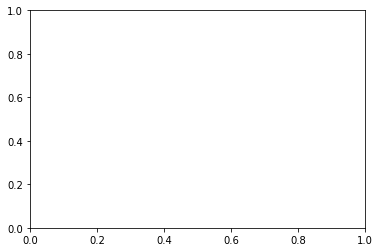